# Exercise Seven Starter: Textual Analysis

In this exercise, I will not be providing the subheadings. Work from our code examples and the textbooks to construct a well-documented notebook that provides a model for initial textual analysis of a multi-document corpus.

Your workflow should:
- 1 Import at least three documents you would like to compare (from text files, or using another format for a challenge.)
- 2 Preprocess the text and create a tokenized corpus from the text of the imported documents.
- 3 Create a document term matrix to enable comparative textual analysis across the full set of documents
- 4 Chart at least one comparison between the documents, using word frequency to map the text
- 5 Calculate the Euclidean distance between the documents, using two key words as the point of comparison 

As a bonus challenge, consider trying one of the other types of distance modeling described in the text.

# Step One
Since it is nearing Halloween, I decided to analyze three classic horror novels:  <i>Frankenstein</i> by Mary Shelley, <i>Dracula</i> by Bram Stoker, and <i>Dr. Jekyll and Mr. Hyde</i> by Robert Louis Stevenson.  All three were available on Project Gutenberg.  I scraped the text from the site and saved them as txt files in VSC, using the author's last name as the file name.  I then imported all three files into this notebook.

In [10]:
# 1
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

corpus = ["shelley.txt","stoker.txt","stevenson.txt"]
titles = ["Frankenstein", "Dracula", "Jekyll And Hyde"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)
print(documents[1][0:100])

The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywher


# Step Two
The following three cells preprocessed the text and created a tokenized corpus from the text of the imported documents.  The first cell imported re and dealt with punctuation.  The second converted the text to lower case and tokenized the language.  The third cell tested the tokens.

In [11]:
# 2
import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

In [12]:
# 2
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [13]:
# 2
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

this


# Step 3
This next cell created a document term matrix to enable comparative textual analysis across the full set of documents.  It converted all the tokenized words into a searchable vocabulary.  

In [14]:
# 3
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'ad", "'all", "'are", "'arf-quid", "'armony", "'as-is", "'at", "'ave", "'bloofer", "'d", "'ead", "'elped", "'em", "'ere", "'here", "'igh", "'im", "'is", "'isself", "'ittin", "'ll", "'m", "'my", "'no", "'ole", "'ome", "'ouse", "'ow", "'owl", "'rats", "'re", "'s", "'that", "'ve", "'yes", "'you", '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '10', '10:30', '11', '11th', '12', '12th', '13', '14', '15', '1500', '16', '17', '17—', '17—.', '18', '18th', '18—', '19', '2', '2.', '20', '2001', '2021', '21', '22', '23', '24', '25', '29', '3', '3.', '30', '31', '4', '4.', '5', '5,000', '5.', '50', '501', '596-1887.']


# Step Four
With the ability to compare words, the next two cells compared the instances of “monster” and “blood.”  I chose these words because all three works prominently feature monsters and a relatively high degree of blood related activity. 

I was surprised to find no use of the word monster in Stevenson’s work, as this is a story of a man becoming a monster.  I expected a high frequency of monster in Shelley’s work, as that is how Frankenstein’s creation is referred too.  Also, no surprise, <i>Dracula</i> had the most instances of blood.

In the second cell for this step, I created a chart to visualize these frequencies.  


In [15]:
# 4
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
monster = vocabulary.index('monster')
blood = vocabulary.index('blood')

monster_counts = document_term_matrix[:, monster]
blood_counts = document_term_matrix[:, blood]
print("Monster: " + str(monster_counts))
print("Blood: " + str(blood_counts))

Monster: [30 23  0]
Blood: [ 19 108   9]


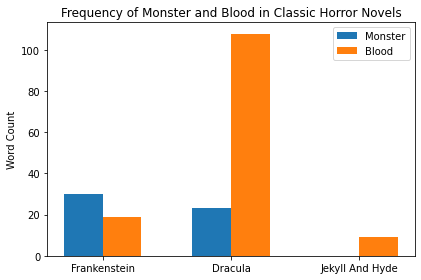

In [16]:
# 4 visualization
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, monster_counts, width, label='Monster')
rects2 = ax.bar(x + width/2, blood_counts, width, label='Blood')

ax.set_ylabel('Word Count')
ax.set_title('Frequency of Monster and Blood in Classic Horror Novels')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

# Step 5
For this step, I calculated the Euclidean distance between the documents’ use of “monster” and “blood.”  First, I defined the terms for each array, again using the authors’ last names.  In the second cell, mathematical magic generated the Euclidean distance of the chosen terms between the three works.

In [17]:
# 5
shelley = np.array([monster_counts[0], blood_counts[0]])
stoker = np.array([monster_counts[1], blood_counts[1]])
stevenson = np.array([monster_counts[2], blood_counts[2]])

In [19]:
# 5'
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))

shelleystoker = euclidean_distance(shelley, stoker)
print(f'Shelley - Stoker: {shelleystoker:.2f}')

shelleystevenson = euclidean_distance(shelley, stevenson)
print(f'Shelley - Stevenson: {shelleystevenson:.2f}')

stokerstevenson = euclidean_distance(stoker, stevenson)
print(f'Stoker - Stevenson: {stokerstevenson:.2f}')

Shelley - Stoker: 89.27
Shelley - Stevenson: 31.62
Stoker - Stevenson: 101.64
